## HW4-Q2. Plotting bias, variance and decision trees

In this problem, we'll investigate the bias and the variance of two different estimators. We'll see (once again) that fitting the data more precisely is not always a good idea.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4741)

### a)

Suppose we have a sinusoid function $f(x)=10\sin(x)$. Our dataset $\mathcal D$ will consist of $n=7$ data points drawn from the following probabilistic model. For each data point $x_i$ we randomly draw uniformly in $[0,6]$ and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution. Plot this dataset $\mathcal D$ and the true function $f(x)$.

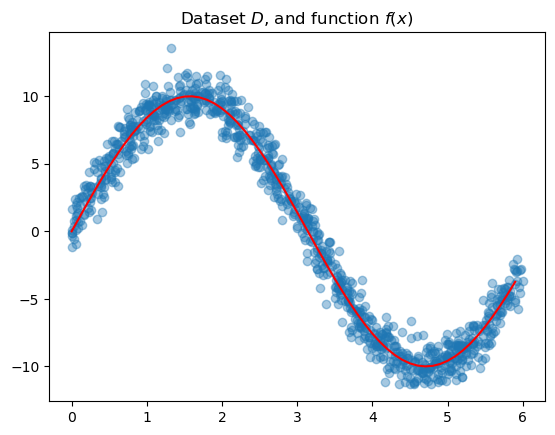

In [16]:
x = np.random.uniform(0,6,1000)
fx = 10 * np.sin(x)
epsilon = np.random.normal(size = 1000)

D = fx + epsilon

plt.scatter(x, D, alpha = 0.4)
plt.plot(np.arange(0,6,0.1), 10*np.sin(np.arange(0,6,0.1)), c = "red")
plt.title("Dataset $D$, and function $f(x)$")
plt.show()

### b)

Fit a linear model $l(x)=w_0+w_1x$ to $\mathcal D$.
Plot this linear model $l(x)$ together with $\mathcal D$ and $f(x)$.

In [13]:
import statsmodels.api as sm

In [17]:
x = x.reshape(len(x),1)
x = np.concatenate([x, np.zeros(len(x)).reshape(len(x),1)], axis = 1)

x

array([[4.04353388, 0.        ],
       [5.58047856, 0.        ],
       [2.69774941, 0.        ],
       ...,
       [1.82079956, 0.        ],
       [3.59192342, 0.        ],
       [5.81813018, 0.        ]])

In [20]:
ols_model = sm.regression.linear_model.OLS(D, x)
results = ols_model.fit()
w = np.array(results.params).reshape([len(results.params),1])

print(w)

[[-0.86771566]
 [ 0.        ]]


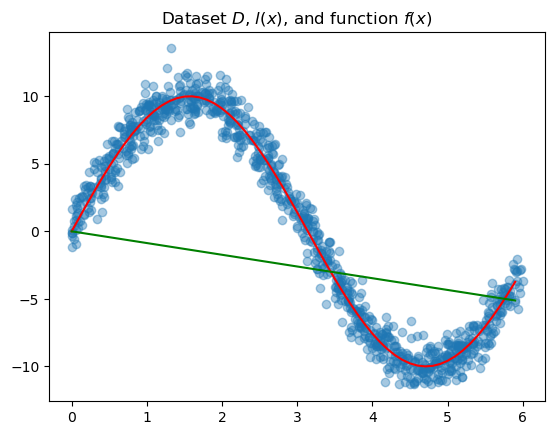

In [23]:
plt.scatter(x[:,0], D, alpha = 0.4)
plt.plot(np.arange(0,6,0.1), 10*np.sin(np.arange(0,6,0.1)), c = "red")
plt.plot(np.arange(0,6,0.1), np.arange(0,6,0.1) * w[0] + w[1], c = "green")
plt.title("Dataset $D$, $l(x)$, and function $f(x)$")
plt.show()

### c)

Fit a cubic model $c(x)=w_0+w_1x+w_2x^2+w_3x^3$ to $\mathcal D$.
Plot this cubic model $c(x)$ together with $\mathcal D$ and $f(x)$.

In [26]:
x = np.concatenate([np.power(x[:,0], 2).reshape(len(x),1), np.power(x[:,0], 3).reshape(len(x),1), x], axis = 1)

x

array([[ 16.35016621,  66.11245094,   4.04353388,   0.        ],
       [ 31.14174092, 173.78581741,   5.58047856,   0.        ],
       [  7.27785191,  19.63382072,   2.69774941,   0.        ],
       ...,
       [  3.31531103,   6.03651685,   1.82079956,   0.        ],
       [ 12.90191388,  46.34268666,   3.59192342,   0.        ],
       [ 33.85063879, 196.94742318,   5.81813018,   0.        ]])

In [27]:
ols_model = sm.regression.linear_model.OLS(D, x)
results = ols_model.fit()
w = np.array(results.params).reshape([len(results.params),1])

print(w)

[[-8.11827796]
 [ 0.87565709]
 [16.77712379]
 [ 0.        ]]


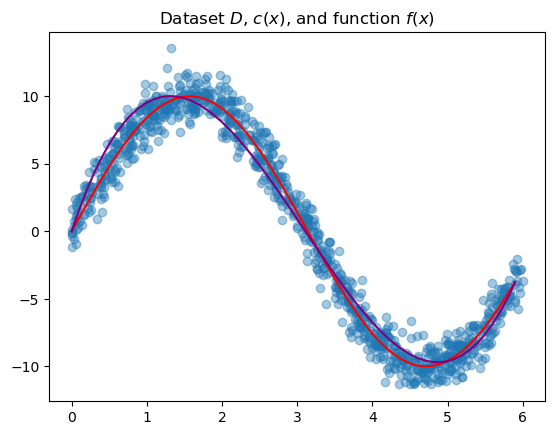

In [30]:
plt.scatter(x[:,2], D, alpha = 0.4)
plt.plot(np.arange(0,6,0.1), 10*np.sin(np.arange(0,6,0.1)), c = "red")
plt.plot(np.arange(0,6,0.1), np.power(np.arange(0,6,0.1), 2) * w[0] + 
         np.power(np.arange(0,6,0.1), 3) * w[1] + np.arange(0,6,0.1) * w[2] + w[3], c = "purple")
plt.title("Dataset $D$, $c(x)$, and function $f(x)$")
plt.show()

### d)

Repeat parts b) and c) for 1000 different randomly drawn sets $\mathcal D$.

Average the 1000 linear models you generated to get the average linear model $\bar{l}(x)$. Plot $\bar{l}(x)$ with $f(x)$.

Generate the average cubic model $\bar{c}(x)$ in the same way, and plot it together with $f(x)$.

In [33]:
def linear_and_cubic_fit():
    x = np.random.uniform(0,6,1000)
    fx = 10 * np.sin(x)
    epsilon = np.random.normal(size = 1000)

    D = fx + epsilon
    
    x = x.reshape(len(x),1)
    x = np.concatenate([x, np.zeros(len(x)).reshape(len(x),1)], axis = 1)
    
    # linear fit
    ols_model = sm.regression.linear_model.OLS(D, x)
    results = ols_model.fit()
    w_linear = np.array(results.params).reshape([len(results.params),1])

    x = np.concatenate([np.power(x[:,0], 2).reshape(len(x),1), np.power(x[:,0], 3).reshape(len(x),1), x], axis = 1)
    
    # cubic fit
    ols_model = sm.regression.linear_model.OLS(D, x)
    results = ols_model.fit()
    w_cubic = np.array(results.params).reshape([len(results.params),1])
    
    # returns each w
    return w_linear.reshape(2,), w_cubic.reshape(4,)

linear_fits = np.zeros((2,1000))
cubic_fits = np.zeros((4,1000))

for i in range(1000):
    linear_fits[:,i], cubic_fits[:,i] = linear_and_cubic_fit()

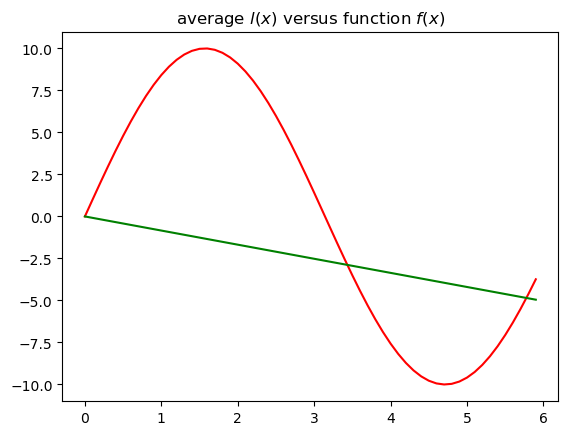

In [55]:
w0_average_l = np.mean(linear_fits[0])
w1_average_l = np.mean(linear_fits[1])

plt.plot(np.arange(0,6,0.1), 10*np.sin(np.arange(0,6,0.1)), c = "red")
plt.plot(np.arange(0,6,0.1), np.arange(0,6,0.1) * w0_average_l + w1_average_l, c = "green")
plt.title("average $ l(x)$ versus function $f(x)$")
plt.show()

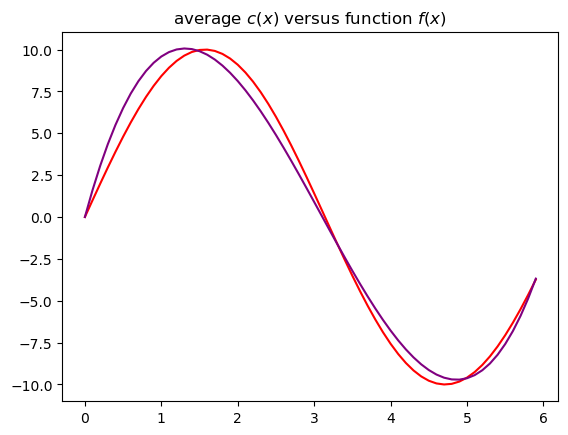

In [56]:
w0_average = np.mean(cubic_fits[0])
w1_average = np.mean(cubic_fits[1])
w2_average = np.mean(cubic_fits[2])
w3_average = np.mean(cubic_fits[3])

plt.plot(np.arange(0,6,0.1), 10*np.sin(np.arange(0,6,0.1)), c = "red")
plt.plot(np.arange(0,6,0.1), np.power(np.arange(0,6,0.1), 2) * w0_average + 
         np.power(np.arange(0,6,0.1), 3) * w1_average + np.arange(0,6,0.1) * w2_average + w3_average, c = "purple")
plt.title("average $ c(x)$ versus function $f(x)$")
plt.show()

### e)

Describe the squared bias graphically with respect to the two plots in part d). Compute the squared bias of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller squared bias?

In [43]:
import scipy.integrate as integrate

In [57]:
# squared bias, for the linear models

sqbias_lin = integrate.quad(lambda x: np.power(((10*np.sin(x)) - (w0_average_l * x + w1_average_l)), 2) * x, 0, 6)
sqbias_lin[0]

572.772359030182

In [58]:
# squared bias, for the cubic models
sqbias_cub = integrate.quad(lambda x: np.power(((10*np.sin(x)) - (w0_average * np.power(x,2) +
                                                                  w1_average * np.power(x,3) + x * w2_average + w3_average)), 2) * x, 0, 6)
sqbias_cub[0]

7.268791778878394

Describing the squared bias graphically, it appears that the average linear model has much higher bias than the average cubic model (since the average linear model is still very far from $f(x)$, while the average cubic model is very close to $f(x)$).

### f)

Compute the variance of $\bar{l}(x)$ and $\bar{c}(x)$. Which model has smaller variance? How do you interpret this? Which model has smaller overall error?

In [59]:
# variance, for the linear models
variance_lin = np.zeros(1000)
for i in range(1000):
    variance_lin[i] = integrate.quad(lambda x: np.power((linear_fits[0,i] * x + linear_fits[1,i]) - (w0_average_l * x + w1_average_l), 2) * x, 0, 6)[0]


variance_lin = np.mean(variance_lin)
variance_lin

0.720014305251767

In [60]:
# variance, for the cubic models
variance_cub = np.zeros(1000)
for i in range(1000):
    variance_cub[i] = integrate.quad(lambda x: np.power((cubic_fits[0,i] * np.power(x,2) + cubic_fits[1,i] * np.power(x,3) +
                                                        cubic_fits[2,i] * x + cubic_fits[3,i]) - (w0_average * np.power(x,2) +
                                                                  w1_average * np.power(x,3) + x * w2_average + w3_average), 2) * x, 0, 6)[0]


variance_cub = np.mean(variance_cub)
variance_cub

0.09191639366065385

The cubic fit model also has smaller variance, and thus smaller overall error!

### g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model (from your answer in the previous question) has smaller overall error?

### h)
We can also investigate the bias-variance tradeoff for trees.

Suppose our dataset $\mathcal D$ consists of $n=10$ data points drawn randomly from two moons and is balanced. Points are labeled 1 in one moon and 0 in the other moon. We set 0.05 to be the standard deviation of Gaussian noise in the data.

Generate a sample dataset using random_state=2, and plot it. (Note: because the data is 2-dimensional, have the x- and y-coordinates on the axes and represent the label with the color blue for 1 and red for 0.)

In [ ]:
from sklearn.datasets import make_moons

###YOUR CODES###

Fit a decision tree model with 2 splits to $\mathcal D$. Use random_state= 2. (Hint: for n splits, there are at most n+1 leaf nodes.)

Plot this tree in the form of rectangular partitions of the feature space with $\mathcal D$. Use lines to mark the splits, and shade the regions with the correct label color.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

###YOUR CODES###

### i)

Repeat part h) to fit models for 1000 different randomly drawn sets $\mathcal D$ from a newly generated set of 10,000 points using random_state=2. Average the individual 2-split decision trees to get the "average" 2-split decision tree model $\bar{t}(x)$ using the bagging ensemble method learned in class. Plot $\bar{t}(x)$ for all 10,000 points.

In [ ]:
from sklearn.ensemble import BaggingClassifier

###YOUR CODES###